# Experiment 10 :- ML Project On Pneumonia Detection 
## What is Pneumonia?


**Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.**
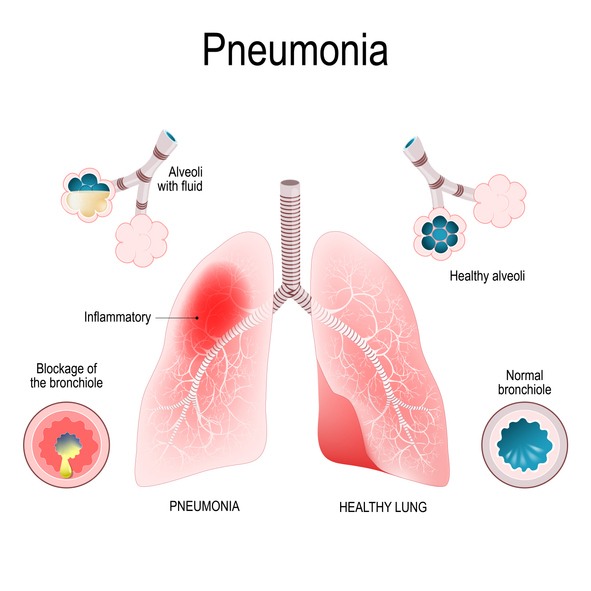

In [1]:
 
import numpy as np # linear algebra
import pandas as pd # data processing
import os
for dirname, _, filenames in os.walk(r'C:\Users\rahsh\OneDrive\Desktop\chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# Importing the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve,roc_curve,accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use("fivethirtyeight")
import pickle
import os
import numpy as np
import cv2
%matplotlib inline

# Description of the Pneumonia Dataset
**The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.
For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.**

In [3]:
labels = ["PNEUMONIA","NORMAL"]
img_size = 200
def get_training_data(data_dir):
  data = []
  for label in labels:
    path = os.path.join(data_dir,label)
    class_num = labels.index(label)
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        resized_arr = cv2.resize(img_arr,(img_size,img_size))
        data.append([resized_arr,class_num])
      except Exception as e:
        print(e)
  return np.array(data)

# Loading the Dataset

In [4]:
train = get_training_data('/Users/rahhh/Projects/Deep Learning/Pneumonia Detection Through Chest Xray/chest_xray/train')
test = get_training_data('/Users/rahhh/Projects/Deep Learning/Pneumonia Detection Through Chest Xray/chest_xray/test')
val = get_training_data('/Users/rahhh/Projects/Deep Learning/Pneumonia Detection Through Chest Xray/chest_xray/val')

/var/folders/3_/lj7czrdd6bzggnk4hfk9ywym0000gn/T/ipykernel_15963/4108421924.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


# Converting the Dataset into a NumPy Array

In [5]:
train

array([[array([[205, 206, 205, ..., 196, 204, 213],
               [204, 204, 204, ..., 197, 211, 208],
               [204, 204, 204, ..., 197, 208, 213],
               ...,
               [ 18,  13,  11, ...,  47,  49,  51],
               [ 14,  14,  11, ...,  47,  48,  49],
               [ 14,  13,  11, ...,  45,  46,  46]], dtype=uint8), 0],
       [array([[ 0,  2, 13, ..., 50, 48, 45],
               [ 0,  9, 14, ..., 54, 51, 51],
               [ 4, 11, 19, ..., 54, 58, 52],
               ...,
               [ 0,  0, 32, ...,  0,  0,  0],
               [ 0,  0, 27, ...,  0,  0,  0],
               [ 0,  0, 24, ...,  0,  0,  0]], dtype=uint8), 0],
       [array([[45, 45, 45, ..., 26, 26, 30],
               [45, 45, 43, ..., 26, 27, 28],
               [44, 44, 44, ..., 26, 24, 27],
               ...,
               [47, 47, 45, ..., 52, 52, 58],
               [46, 46, 44, ..., 52, 55, 59],
               [46, 46, 44, ..., 52, 52, 58]], dtype=uint8), 0],
       ...,
       

In [6]:
test

array([[array([[167, 177, 202, ..., 175, 182, 176],
               [ 23,  10, 202, ..., 172, 162, 161],
               [ 31,  70, 205, ..., 169, 152, 155],
               ...,
               [ 25,  23,  23, ...,  24,  24,  24],
               [ 38,  28,  23, ...,  25,  25,  24],
               [ 84,  28,  23, ...,  25,  25,  24]], dtype=uint8), 0],
       [array([[134, 123, 101, ..., 155, 165, 164],
               [140, 133, 117, ..., 150, 165, 160],
               [136, 102, 100, ..., 163, 169, 178],
               ...,
               [ 19,  19,  19, ...,  19,  19,  19],
               [ 19,  19,  19, ...,  19,  19,  19],
               [ 19,  19,  19, ...,  19,  19,  19]], dtype=uint8), 0],
       [array([[222, 221, 218, ..., 156, 178, 180],
               [215, 217, 215, ..., 175, 176, 171],
               [212, 217, 217, ..., 183, 176, 173],
               ...,
               [205, 205, 203, ...,  15,  15,  15],
               [205, 205, 203, ...,  15,  15,  15],
               [20

In [7]:
val

array([[array([[ 0,  0,  0, ..., 43, 33, 26],
               [ 0,  0,  0, ..., 43, 34, 24],
               [ 0,  0,  0, ..., 42, 33, 24],
               ...,
               [ 1,  1,  1, ...,  2,  2,  2],
               [ 1,  1,  1, ...,  2,  2,  2],
               [ 1,  1,  1, ...,  2,  2,  2]], dtype=uint8), 0],
       [array([[  0,   0,   0, ...,   6,   6,   6],
               [  0,   0,   0, ...,   6,   6,   6],
               [  0,   0,   0, ...,   6,   6,   6],
               ...,
               [  2,   2,   3, ...,  23,   9,   8],
               [103,  13,   4, ...,  11,  16, 105],
               [  6,   5,   4, ...,  12,  11,  14]], dtype=uint8), 0],
       [array([[65, 67, 65, ..., 95, 95, 96],
               [59, 61, 61, ..., 98, 94, 92],
               [54, 56, 52, ..., 95, 95, 90],
               ...,
               [15, 41, 52, ...,  9,  8,  8],
               [20, 41, 55, ..., 10,  7, 10],
               [27, 42, 56, ...,  8,  9, 10]], dtype=uint8), 0],
       [array([[16,

# Data Visualization & Preprocessing

In [8]:
pneumonia = 0
normal = 0
for i,j in train:
  if j==0:
    pneumonia+=1
  else:
      normal+=1
print("Pneumonia:", pneumonia)
print("Normal:",normal)
print("Pneumonia - Normal",pneumonia-normal)

Pneumonia: 3875
Normal: 1341
Pneumonia - Normal 2534


**Previewing the images of both the classes**

PNEUMONIA


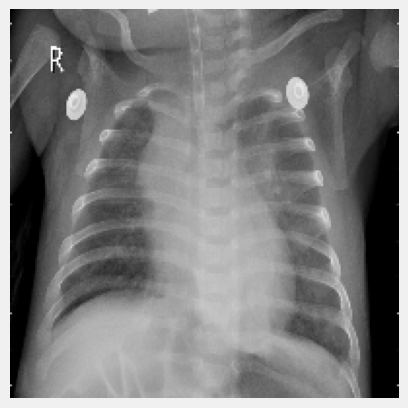

In [9]:
plt.imshow(train[1][0],cmap = "gray")
plt.axis("off")
print(labels[train[1][1]])

In [10]:
x = []
y = []
for feature,label in train:
  x.append(feature)
  y.append(label)
for feature,label in test:
  x.append(feature)
  y.append(label)
for feature,label in val:
  x.append(feature)
  y.append(label)

x= np.array(x).reshape(-1,img_size,img_size,1)
y = np.array(y)

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2,random_state = 43)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.20,random_state = 43)

In [11]:
# Normalize the data
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

In [12]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# Data Augmentation
**In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations.
Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.
By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.**

In [13]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    rotation_range=90, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    zoom_range=0.1,          
    horizontal_flip=True, 
    vertical_flip=True,
)

In [14]:
x_train.shape

(3747, 200, 200, 1)

For the data augmentation, i choosed to :
1. Randomly rotate some training images by 30 degrees 
2. Randomly Zoom by 20% some training images
3. Randomly shift images horizontally by 10% of the width 
4. Randomly shift images vertically by 10% of the height 
5. Randomly flip images horizontally.
Once our model is ready, we fit the training dataset.

# Training the Model

In [15]:
model = Sequential()

model.add(Conv2D(256,(3,3),input_shape = x_train.shape[1:],padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),padding = "same"))
model.add(BatchNormalization(axis = 1))

model.add(Conv2D(64,(3,3),padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),padding = "same"))
model.add(BatchNormalization(axis = 1))

model.add(Conv2D(16,(3,3),padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),padding = "same"))
model.add(BatchNormalization(axis = 1))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

early_stop = EarlyStopping(patience = 3,monitor = "val_loss",restore_best_weights = True)
adam = Adam(learning_rate = 0.0001)
model.compile(loss="binary_crossentropy",optimizer = adam,metrics = ["acc"])

2022-10-12 16:04:48.415620: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 256)     2560      
_________________________________________________________________
activation (Activation)      (None, 200, 200, 256)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 256)     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 256)     400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      147520    
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0

In [32]:
history = model.fit(datagen.flow(x_train,y_train,batch_size = 10),callbacks = [early_stop],validation_data = (x_val,y_val),epochs = 15)

Epoch 1/15
375/375 [==============================] - 663s 2s/step - loss: 0.3466 - acc: 0.8433 - val_loss: 0.3883 - val_acc: 0.8058
Epoch 2/15
375/375 [==============================] - 564s 2s/step - loss: 0.3184 - acc: 0.8604 - val_loss: 0.2968 - val_acc: 0.8741
Epoch 3/15
375/375 [==============================] - 382s 1s/step - loss: 0.3202 - acc: 0.8655 - val_loss: 0.3177 - val_acc: 0.8634
Epoch 4/15
375/375 [==============================] - 378s 1s/step - loss: 0.2806 - acc: 0.8810 - val_loss: 0.3922 - val_acc: 0.8100
Epoch 5/15
375/375 [==============================] - 377s 1s/step - loss: 0.2756 - acc: 0.8810 - val_loss: 0.2299 - val_acc: 0.9125
Epoch 6/15
375/375 [==============================] - 377s 1s/step - loss: 0.2777 - acc: 0.8818 - val_loss: 0.2586 - val_acc: 0.8954
Epoch 7/15
375/375 [==============================] - 377s 1s/step - loss: 0.2727 - acc: 0.8858 - val_loss: 0.2362 - val_acc: 0.9061
Epoch 8/15
375/375 [==============================] - 370s 987ms/step

In [33]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

37/37 [==============================] - 41s 1s/step - loss: 0.2181 - acc: 0.9138
Loss of the model is -  0.21812944114208221
37/37 [==============================] - 41s 1s/step - loss: 0.2181 - acc: 0.9138
Accuracy of the model is -  91.38225317001343 %


In [34]:
model.evaluate(x_test,y_test)

37/37 [==============================] - 42s 1s/step - loss: 0.2181 - acc: 0.9138


[0.21812944114208221, 0.9138225317001343]

# Analysis after Model Training

# Graphs and Matrix

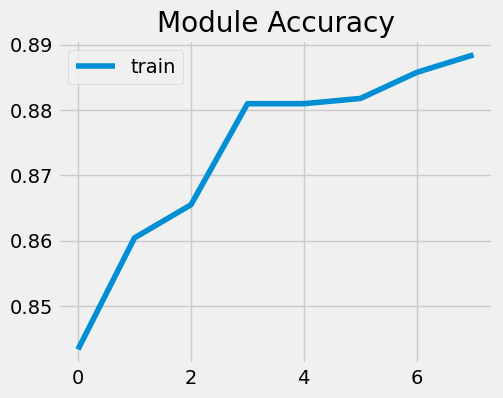

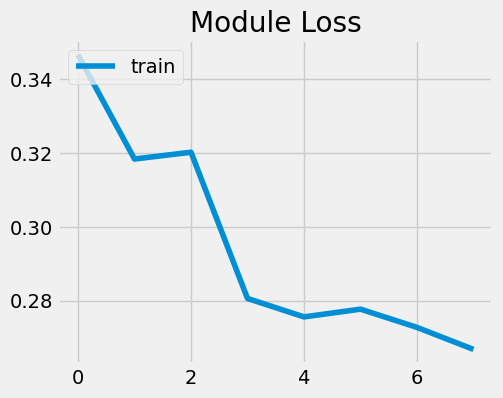

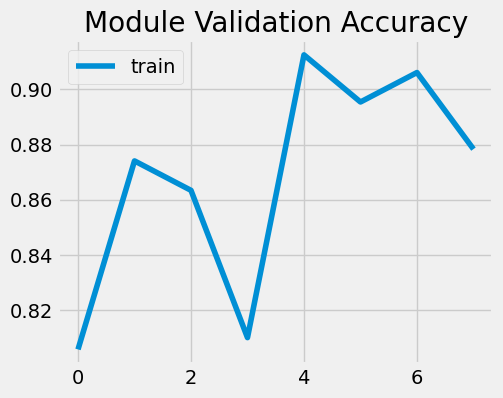

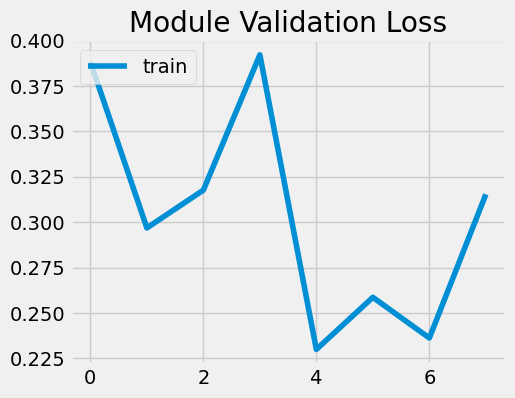

In [35]:
plt.figure(figsize = (5,4))
plt.plot(history.history["acc"])
plt.title("Module Accuracy")
plt.legend(["train"],loc = "upper left")
plt.show()

plt.figure(figsize = (5,4))
plt.plot(history.history["loss"])
plt.title("Module Loss")
plt.legend(["train"],loc = "upper left")
plt.show()

plt.figure(figsize = (5,4))
plt.plot(history.history["val_acc"])
plt.title("Module Validation Accuracy")
plt.legend(["train"],loc = "upper left")
plt.show()

plt.figure(figsize = (5,4))
plt.plot(history.history["val_loss"])
plt.title("Module Validation Loss")
plt.legend(["train"],loc = "upper left")
plt.show()

In [36]:
pred = model.predict(x_train)
precisions,recalls,thresholds = precision_recall_curve(y_train,pred)
fpr,tpr,thresholds2 = roc_curve(y_train,pred)

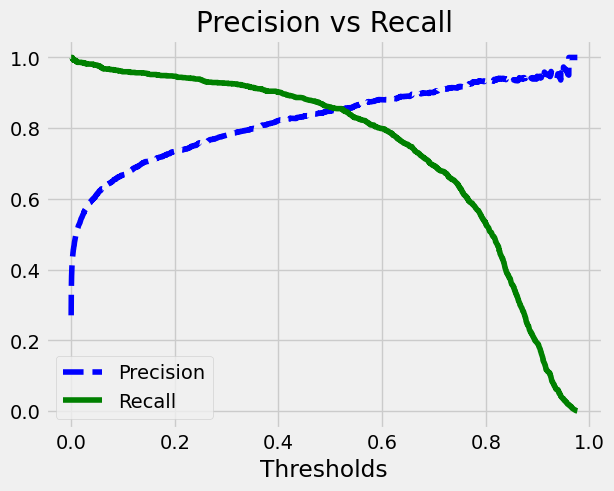

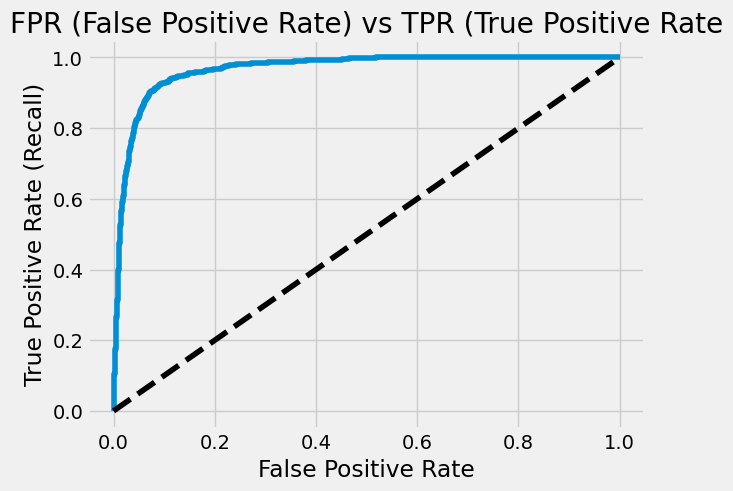

In [37]:
def plot_precision_recall(precisions,recalls,thresholds):
  plt.plot(thresholds,precisions[:-1],"b--")
  plt.plot(thresholds,recalls[:-1],"g-")
  plt.title("Precision vs Recall")
  plt.xlabel("Thresholds")
  plt.legend(["Precision","Recall"],loc = "best")
  plt.show()

def plot_roc(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.plot([0,1],[0,1],"k--")
  plt.title("FPR (False Positive Rate) vs TPR (True Positive Rate")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate (Recall)")
  plt.show()

plot_precision_recall(precisions,recalls,thresholds)
plot_roc(fpr,tpr)

In [38]:
predictions = model.predict(x_test)

In [39]:
train[0]

array([array([[205, 206, 205, ..., 196, 204, 213],
              [204, 204, 204, ..., 197, 211, 208],
              [204, 204, 204, ..., 197, 208, 213],
              ...,
              [ 18,  13,  11, ...,  47,  49,  51],
              [ 14,  14,  11, ...,  47,  48,  49],
              [ 14,  13,  11, ...,  45,  46,  46]], dtype=uint8), 0],
      dtype=object)

In [40]:
predictions

array([[0.9128859 ],
       [0.00225297],
       [0.01037955],
       ...,
       [0.7166242 ],
       [0.9088824 ],
       [0.5053506 ]], dtype=float32)

In [41]:
binary_predictions = []
threshold = thresholds[np.argmax(precisions >= 0.80)]
for i in predictions:
  if i >= threshold:
   binary_predictions.append(1)
  else:
    binary_predictions.append(0)


In [42]:
print("Accuracy on testing set:", accuracy_score(binary_predictions,y_test))
print("Precision on testing set:",precision_score(binary_predictions,y_test))
print("Recall on testing set:", recall_score(binary_predictions,y_test))


Accuracy on testing set: 0.9018771331058021
Precision on testing set: 0.8920634920634921
Recall on testing set: 0.7762430939226519


[Text(0, 0.5, 'PNEUMONIA'), Text(0, 1.5, 'NORMAL')]

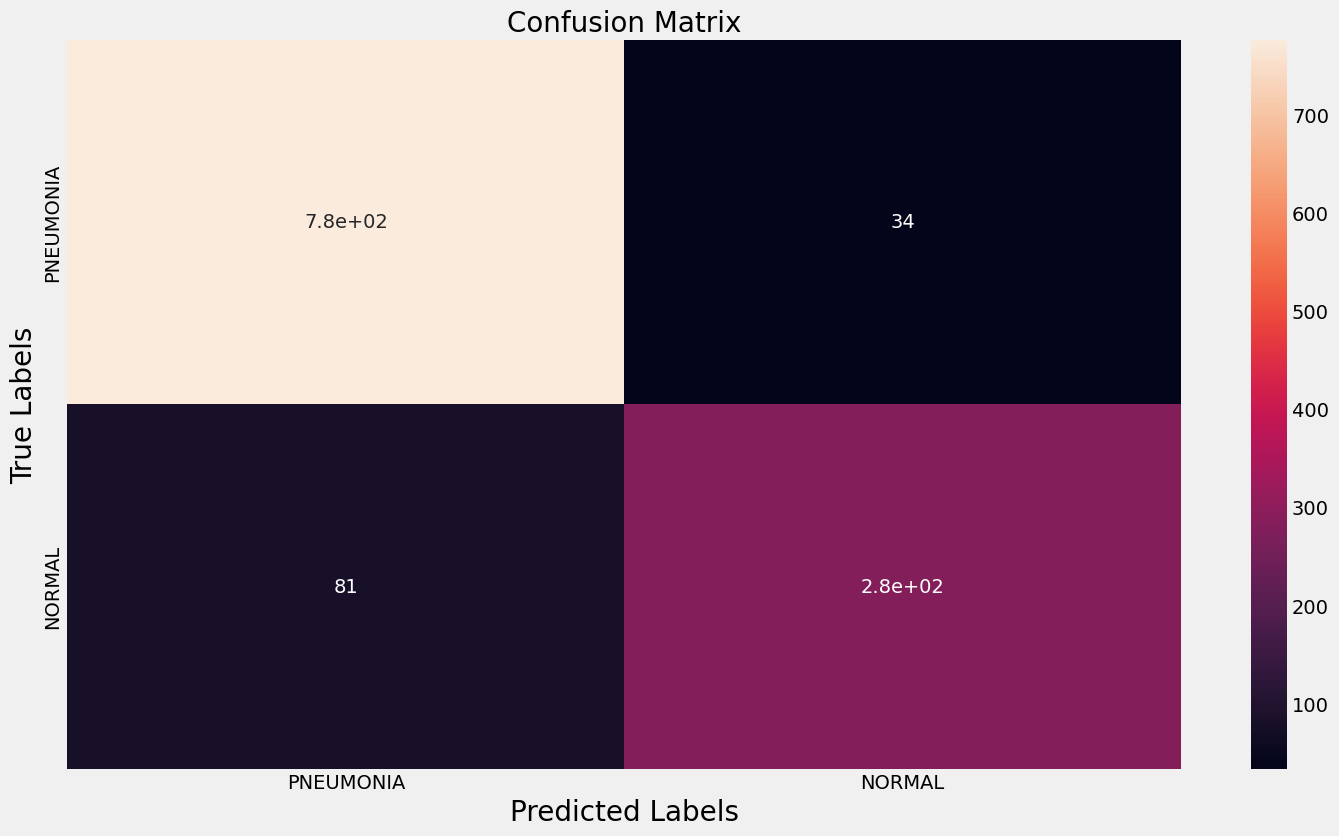

In [43]:
matrix = confusion_matrix(binary_predictions,y_test)
plt.figure(figsize = (16,9))
ax = plt.subplot()
sns.heatmap(matrix,annot = True,ax = ax)

ax.set_xlabel("Predicted Labels",size = 20)
ax.set_ylabel("True Labels",size = 20)
ax.set_title("Confusion Matrix", size = 20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

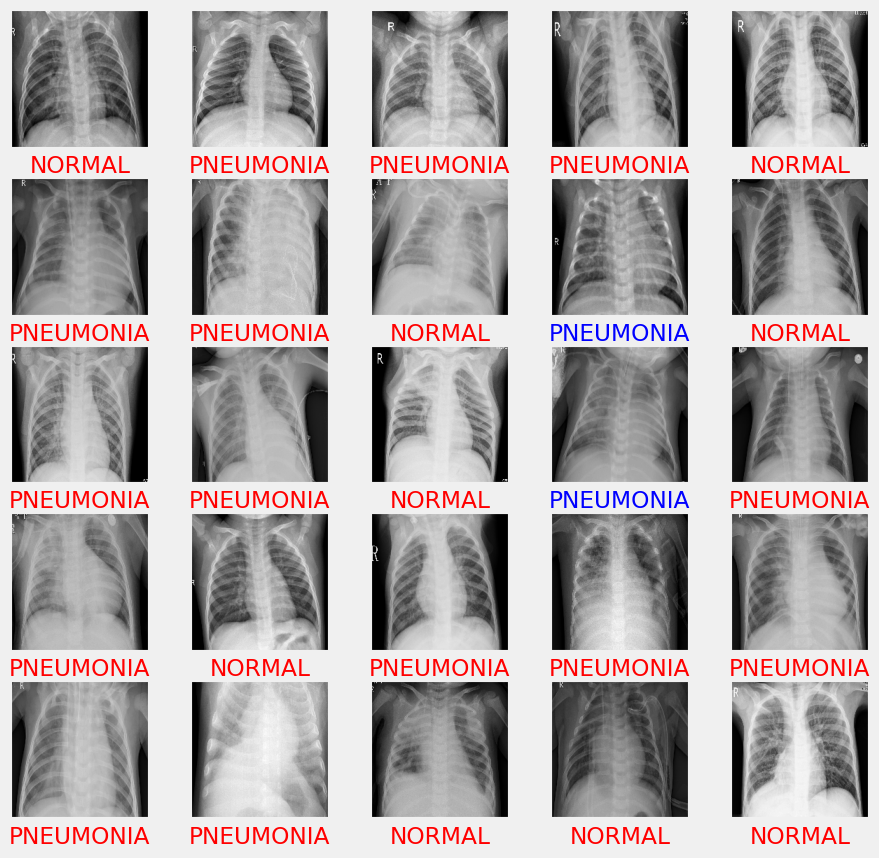

In [44]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train.reshape(-1,img_size,img_size)[i],cmap = "gray")
  if(binary_predictions[i]==y_test[i]):
    plt.xlabel(labels[binary_predictions[i]],color = "red")
  else:
    plt.xlabel(labels[binary_predictions[i]],color = "blue")
plt.show()

In [45]:
model.save("Pneumonia_model.h5")

In [46]:
model